# **LSTM MultiEntrada Clasificador - Empresa Southern Copper**
#### **Curso:** Inteligencia de Negocios
#### **Docente:**  Mg. Ernesto D. Cancho Rodríguez
#### **Equipo:** D
#### **Integrantes:**
*   Hurtado Santos, Estiven Salvador - 20200135
*   López Terrones, Ximena Xiomy - 20200020
*   Llactahuaman Muguerza, Anthony Joel - 20200091
*   Mondragón Zúñiga, Rubén Alberto - 20200082
*   Morales Robladillo, Nicole Maria - 20200136
*   Aquije Vásquez, Carlos Adrian - 19200319
*   Cespedes Flores, Sebastian - 1820025

### Importamos Librerías

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
#Importamos la librería nueva
import yfinance as yf

In [3]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'

### Carga de datos SCCO

### Inputs para Predicción

#### Mercado de Commodities

##### Datos de GLD (ORO)

##### Datos de SLV (Plata)

##### Datos de COPX (Cobre)

#### Índicies

##### Datos de GSPC (Índice SP500)


##### Datos de IXIC (Índice NASDAQ)

##### Datos de DJI (Índice Dow Jones)

#### Mercado de divisas y Criptomonedas

##### Datos de PEN

##### Datos ETH

##### Datos BZ

##### Datos BTC

### Transformaciones

### Data del BCRP

#### Tasas de Interés

**Realizamos Transformaciones**

### Indicadores Bursátiles

**Realizamos Transformaciones**

#### Indicadores de Riesgo

#### Indice Precios Consumidor

#### Fred - Tasa Efectiva

### Combinamos la data

**Instalamos dependencias extras necesarias**

**Importamos librerías descargadas**

#### Limpieza de Datos

In [4]:
def obtenerData(instrumentoFinanciero, fechaInicio, fechaFin):
    IF_df = yf.download(instrumentoFinanciero,
                        start=fechaInicio, end=fechaFin)
    IF_df.columns += "_" + instrumentoFinanciero
    GLD_data = yf.download('GLD', start=fechaInicio, end=fechaFin)
    GLD_data.columns += "_GLD"
    SLV_data = yf.download('SLV', start=fechaInicio, end=fechaFin)
    SLV_data.columns += "_SLV"
    COPX_data = yf.download('COPX', start=fechaInicio, end=fechaFin)
    COPX_data.columns += "_COPX"
    GSPC_data = yf.download('^GSPC', start=fechaInicio, end=fechaFin)
    GSPC_data.columns += "_GSPC"
    IXIC_data = yf.download('^IXIC', start=fechaInicio, end=fechaFin)
    IXIC_data.columns += "_IXIC"
    DJI_data = yf.download('^DJI', start=fechaInicio, end=fechaFin)
    DJI_data.columns += "_DJI"
    PEN_X_data = yf.download('PEN=X', start=fechaInicio, end=fechaFin)
    PEN_X_data.columns += "_PEN_X"
    BZ_F_data = yf.download('BZ=F', start=fechaInicio, end=fechaFin)
    BZ_F_data.columns += "_BZ_F"
    df = pd.merge(IF_df, GLD_data, on='Date')
    df = pd.merge(df, SLV_data, on='Date')
    df = pd.merge(df, COPX_data, on='Date')
    df = pd.merge(df, GSPC_data, on='Date')
    df = pd.merge(df, IXIC_data, on='Date')
    df = pd.merge(df, DJI_data, on='Date')
    df = pd.merge(df, PEN_X_data, on='Date')
    df = pd.merge(df, BZ_F_data, on='Date')
    df = df.drop(['Volume_PEN_X'], axis=1)
    return df


In [5]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'
df = obtenerData('BHP', fechaInicio, fechaFin)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df['BHP_Return'] = df['Close_BHP'].pct_change()
df['BHP_Return'] = df['BHP_Return'].shift(-1)
df['BHP_Return'] = df['BHP_Return'].fillna(0)
df

,Open_BHP,High_BHP,Low_BHP,Close_BHP,Adj Close_BHP,Volume_BHP,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BHP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.703835,42.399643,41.587868,42.390724,32.677605,2971883,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,0.003998
2018-01-03,42.515610,42.640499,42.176628,42.560215,32.808266,2792747,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.001886
2018-01-04,42.774307,42.899197,42.578056,42.640499,32.870152,2648138,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,0.007113
2018-01-05,42.694023,42.952721,42.479931,42.943802,33.103958,1454385,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,0.007478
2018-01-08,43.273865,43.345226,43.131134,43.264942,33.351513,3178596,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,0.007010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,62.029999,62.139999,61.330002,62.049999,62.049999,1235100,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.011120
2022-12-27,62.689999,63.090000,62.400002,62.740002,62.740002,1457300,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.015939
2022-12-28,62.869999,62.930000,61.639999,61.740002,61.740002,1670300,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.008098


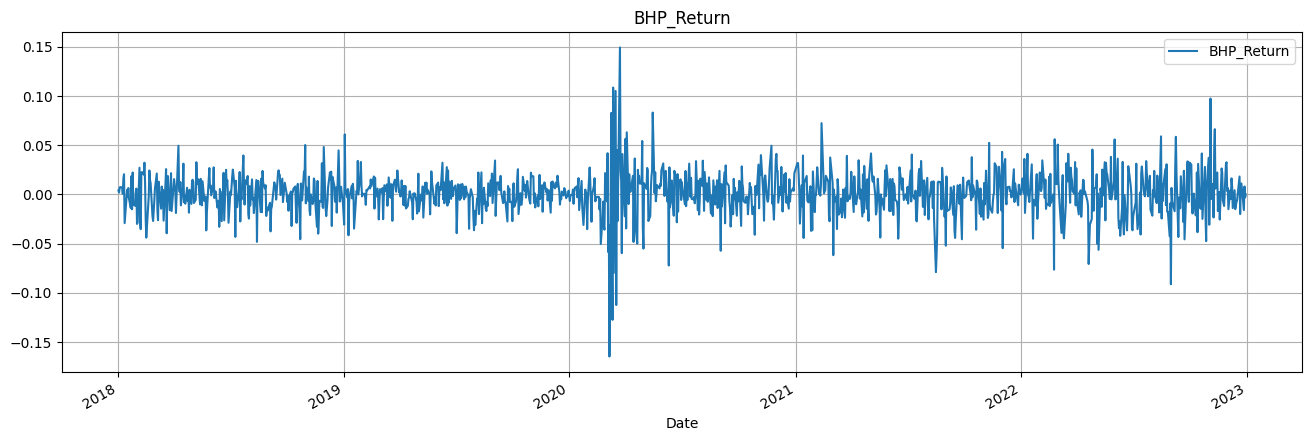

In [7]:
plt.figure(figsize=(16, 5))
plt.title("BHP_Return")
df.BHP_Return.plot()
plt.grid(True);
plt.legend()
plt.show()

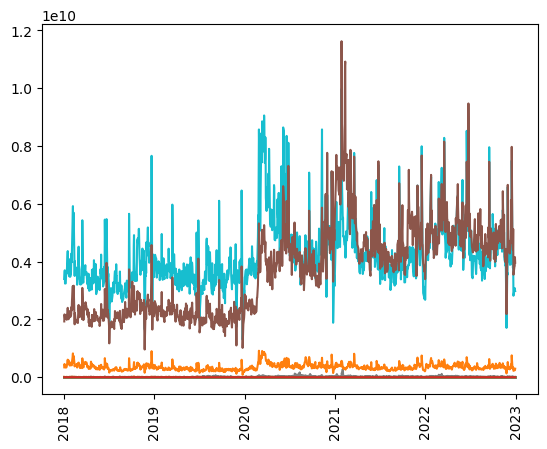

In [8]:
plt.plot(df);
plt.xticks(rotation='vertical');

### Procesamiento - Paso 1



In [9]:
df02 = df.copy()

In [10]:
df02.sample(10)

,Open_BHP,High_BHP,Low_BHP,Close_BHP,Adj Close_BHP,Volume_BHP,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BHP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-11,61.034790,62.105263,60.972347,61.150757,57.251545,5286972,183.740005,185.779999,183.440002,185.089996,...,3.631287,3.710000,3.710000,109.720001,113.879997,107.129997,112.669998,112.669998,18819,-0.044639
2019-11-11,44.549507,44.968777,44.335415,44.933094,40.075932,2126089,137.610001,137.789993,136.440002,137.059998,...,3.271733,3.357500,3.357500,62.509998,62.750000,61.580002,62.180000,62.180000,23316,-0.000993
2022-12-22,61.650002,61.730000,60.570000,61.410000,61.410000,2307600,167.759995,167.759995,166.059998,166.759995,...,3.724513,3.795000,3.795000,82.370003,83.860001,80.680000,80.980003,80.980003,16647,0.010422
2019-05-10,45.851917,46.467442,45.602142,46.271187,39.992252,1482410,121.410004,121.730003,121.300003,121.430000,...,3.233100,3.312000,3.312000,70.300003,71.230003,70.169998,70.620003,70.620003,50395,-0.023520
2018-01-25,44.603031,44.745762,43.577164,43.630688,33.633453,2269016,128.690002,129.509995,127.360001,127.970001,...,3.138900,3.210000,3.210000,70.709999,71.260002,69.970001,70.419998,70.419998,24111,0.022286
2022-08-22,56.810001,57.430000,56.410000,57.310001,53.655693,3738400,161.660004,162.119995,161.360001,161.639999,...,3.777643,3.771454,3.771454,95.660004,97.250000,92.360001,96.480003,96.480003,26974,0.025824
2020-05-11,35.727028,36.057091,35.637821,35.950047,33.001053,1677016,160.339996,160.710007,158.889999,159.419998,...,3.329291,3.398000,3.398000,30.680000,31.450001,29.360001,29.629999,29.629999,33638,-0.022084
2018-11-30,39.411240,39.634254,39.170383,39.571812,32.117561,3899735,115.419998,115.660004,115.040001,115.540001,...,3.302900,3.377000,3.377000,59.230000,59.889999,58.250000,58.709999,58.709999,1071,0.048242
2021-02-17,67.912575,67.912575,66.815346,67.413025,63.114506,2197272,166.919998,167.339996,165.850006,166.330002,...,3.587448,3.652000,3.652000,63.549999,64.949997,62.750000,64.339996,64.339996,47339,0.003043


### Tratamiento de Missing Values

In [11]:
df03 = df02.dropna()  # Eliminar filas con valores nulos

In [12]:
df03

,Open_BHP,High_BHP,Low_BHP,Close_BHP,Adj Close_BHP,Volume_BHP,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BHP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.703835,42.399643,41.587868,42.390724,32.677605,2971883,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,0.003998
2018-01-03,42.515610,42.640499,42.176628,42.560215,32.808266,2792747,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.001886
2018-01-04,42.774307,42.899197,42.578056,42.640499,32.870152,2648138,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,0.007113
2018-01-05,42.694023,42.952721,42.479931,42.943802,33.103958,1454385,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,0.007478
2018-01-08,43.273865,43.345226,43.131134,43.264942,33.351513,3178596,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,0.007010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,62.029999,62.139999,61.330002,62.049999,62.049999,1235100,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.011120
2022-12-27,62.689999,63.090000,62.400002,62.740002,62.740002,1457300,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.015939
2022-12-28,62.869999,62.930000,61.639999,61.740002,61.740002,1670300,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.008098


### Particionamiento en Entrenamiento y Test

In [13]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df03) * 0.8)
train_data = df03[:train_size]
test_data = df03[train_size-100:]

In [14]:
print(df03.shape)
print(train_size)
print(train_data.shape)
print(test_data.shape)

(1254, 54)
1003
(1003, 54)
(351, 54)


### Normalizamos la data en Escala de 0 y 1

In [15]:
df03.head()

,Open_BHP,High_BHP,Low_BHP,Close_BHP,Adj Close_BHP,Volume_BHP,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BHP_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.703835,42.399643,41.587868,42.390724,32.677605,2971883,124.660004,125.180000,124.389999,125.150002,...,3.1645,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,0.003998
2018-01-03,42.515610,42.640499,42.176628,42.560215,32.808266,2792747,125.050003,125.089996,124.099998,124.820000,...,3.1712,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.001886
2018-01-04,42.774307,42.899197,42.578056,42.640499,32.870152,2648138,124.889999,125.849998,124.739998,125.459999,...,3.1667,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,0.007113
2018-01-05,42.694023,42.952721,42.479931,42.943802,33.103958,1454385,124.930000,125.480003,124.830002,125.330002,...,3.1480,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,0.007478
2018-01-08,43.273865,43.345226,43.131134,43.264942,33.351513,3178596,125.199997,125.320000,124.900002,125.309998,...,3.1462,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,0.007010


In [16]:
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
scaled_train_data = scaler.fit_transform(train_data.drop(['BHP_Return'], axis=1))

In [18]:
scaled_train_data.shape

(1003, 53)

In [19]:
scaled_test_data = scaler.transform(test_data.drop(['BHP_Return'], axis=1))

In [20]:
print(type(scaled_train_data))
print(len(scaled_train_data))
print(scaled_train_data.shape)
scaled_train_data

<class 'numpy.ndarray'>
1003
(1003, 53)


array([[0.31487679, 0.31112882, 0.33039045, ..., 0.70433873, 0.70433873,
        0.27706508],
       [0.33280782, 0.31651374, 0.34333925, ..., 0.72327412, 0.72327412,
        0.29527324],
       [0.33852211, 0.32229755, 0.35216799, ..., 0.72670342, 0.72670342,
        0.26035129],
       ...,
       [0.58108366, 0.57638611, 0.5954483 , ..., 0.89309679, 0.89309679,
        0.07892498],
       [0.59172413, 0.57897882, 0.5972141 , ..., 0.89443862, 0.89443862,
        0.00327609],
       [0.57852211, 0.5704029 , 0.59368259, ..., 0.89264941, 0.89264941,
        0.24770674]])

In [21]:
# Crear secuencias de tiempo para el modelo LSTM
window_size = 100

def create_sequences(data):
    x = []
    y = []
    for i in range( window_size , len(data) ):

        x.append( data[i-window_size:i] )
        y.append( data[i][-1] )


    return np.array(x), np.array(y)

In [22]:
x_train, y_train = create_sequences(scaled_train_data)

In [23]:
x_train.shape

(903, 100, 53)

In [24]:
y_train.shape

(903,)

In [25]:
x_test, y_test = create_sequences(scaled_test_data)

In [26]:
x_test.shape

(251, 100, 53)

In [27]:
y_test.shape

(251,)

In [28]:
x_train.shape[1]

100

In [29]:
x_train.shape[2]

53

### Modelo LSTM

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=160, return_sequences=True,
               input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(units=160))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 160)          136960    
                                                                 
 lstm_1 (LSTM)               (None, 160)               205440    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 342561 (1.31 MB)
Trainable params: 342561 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Compilar el modelo
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [32]:
# Entrenar el modelo
model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/100
15/15 [==============================] - 5s 207ms/step - loss: 0.6601 - accuracy: 0.0011 - val_loss: 0.5976 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 3s 198ms/step - loss: 0.6558 - accuracy: 0.0011 - val_loss: 0.5921 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 3s 204ms/step - loss: 0.6549 - accuracy: 0.0011 - val_loss: 0.6002 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 3s 194ms/step - loss: 0.6539 - accuracy: 0.0011 - val_loss: 0.5891 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 3s 190ms/step - loss: 0.6575 - accuracy: 0.0011 - val_loss: 0.5982 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 3s 194ms/step - loss: 0.6529 - accuracy: 0.0011 - val_loss: 0.6206 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 3s 201ms/step - loss: 0.6525 - accuracy: 0.0011 - val_loss: 0.610

15/15 [==============================] - 3s 206ms/step - loss: 0.6220 - accuracy: 0.0022 - val_loss: 0.5932 - val_accuracy: 0.0000e+00
Epoch 57/100
15/15 [==============================] - 3s 197ms/step - loss: 0.6260 - accuracy: 0.0011 - val_loss: 0.5962 - val_accuracy: 0.0000e+00
Epoch 58/100
15/15 [==============================] - 3s 205ms/step - loss: 0.6244 - accuracy: 0.0022 - val_loss: 0.6148 - val_accuracy: 0.0000e+00
Epoch 59/100
15/15 [==============================] - 3s 209ms/step - loss: 0.6236 - accuracy: 0.0022 - val_loss: 0.6271 - val_accuracy: 0.0000e+00
Epoch 60/100
15/15 [==============================] - 3s 202ms/step - loss: 0.6244 - accuracy: 0.0022 - val_loss: 0.6195 - val_accuracy: 0.0000e+00
Epoch 61/100
15/15 [==============================] - 3s 209ms/step - loss: 0.6221 - accuracy: 0.0022 - val_loss: 0.6233 - val_accuracy: 0.0000e+00
Epoch 62/100
15/15 [==============================] - 3s 206ms/step - loss: 0.6225 - accuracy: 0.0022 - val_loss: 0.6013 - va

In [33]:
# Evaluar el modelo en el conjunto de ENTRENAMIENTO
loss_train, accuracy_train = model.evaluate(x_train, y_train)
print('Loss:', loss_train)
print('Accuracy:', accuracy_train)

29/29 [==============================] - 1s 24ms/step - loss: 0.6085 - accuracy: 0.0022
Loss: 0.608505368232727
Accuracy: 0.0022148394491523504


In [34]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

8/8 [==============================] - 0s 27ms/step - loss: 0.6140 - accuracy: 0.0000e+00
Loss: 0.6139818429946899
Accuracy: 0.0


In [35]:
# Predecir la tendencia para el periodo de TRAINING, evaluar el aprendizaje
train_predict = model.predict(x_train)
train_predict

29/29 [==============================] - 1s 24ms/step


array([[0.20348738],
       [0.10472083],
       [0.0859977 ],
       [0.41889733],
       [0.3928774 ],
       [0.36067277],
       [0.35498765],
       [0.3436955 ],
       [0.32136863],
       [0.28343853],
       [0.2801499 ],
       [0.27858353],
       [0.2807207 ],
       [0.27098197],
       [0.2942835 ],
       [0.33669448],
       [0.40539324],
       [0.48741463],
       [0.5382655 ],
       [0.54197097],
       [0.43711215],
       [0.33668777],
       [0.13123679],
       [0.043323  ],
       [0.40277657],
       [0.2648968 ],
       [0.25592494],
       [0.19786169],
       [0.16554025],
       [0.26583633],
       [0.48844266],
       [0.4893301 ],
       [0.32748127],
       [0.2714246 ],
       [0.268187  ],
       [0.27345467],
       [0.26045832],
       [0.26077923],
       [0.24621369],
       [0.25872144],
       [0.24330796],
       [0.2182474 ],
       [0.17396204],
       [0.10634477],
       [0.11080278],
       [0.21431269],
       [0.22011726],
       [0.219

In [36]:
# Predecir la tendencia para el periodo de TEST, incluido el día siguiente
test_predict = model.predict(x_test)


8/8 [==============================] - 0s 24ms/step


In [37]:
test_predict.shape

(251, 1)

In [38]:
train  = df03[:train_size]
valid  = df03[train_size:]
valid['Predictions'] = test_predict

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12808\1475914596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


In [39]:
valid

,Open_BHP,High_BHP,Low_BHP,Close_BHP,Adj Close_BHP,Volume_BHP,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BHP_Return,Predictions
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,54.049953,54.219448,53.648529,53.826939,50.394722,1776112,168.860001,169.009995,168.000000,168.330002,...,3.9870,3.9870,77.940002,79.279999,77.040001,78.980003,78.980003,27224,0.016241,0.207444
2022-01-04,53.996433,54.986618,53.916145,54.701160,51.213200,3723177,168.899994,169.720001,168.729996,169.570007,...,3.9625,3.9625,78.949997,80.550003,78.599998,80.000000,80.000000,31321,0.011905,0.248919
2022-01-05,55.075825,56.181980,55.057983,55.352364,51.822880,7154895,170.619995,170.929993,168.899994,169.059998,...,3.9550,3.9550,80.080002,81.489998,79.550003,80.800003,80.800003,35152,0.001128,0.303484
2022-01-06,55.557537,55.878681,54.772526,55.414806,51.881340,3280382,167.160004,167.750000,166.860001,166.990005,...,3.9590,3.9590,80.150002,82.839996,79.629997,81.989998,81.989998,41582,0.036059,0.359208
2022-01-07,56.101696,57.421944,56.030331,57.413025,53.752144,4178752,167.369995,168.009995,166.860001,167.750000,...,3.9650,3.9650,82.059998,82.989998,81.440002,81.750000,81.750000,29501,-0.018801,0.320323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,62.029999,62.139999,61.330002,62.049999,62.049999,1235100,166.880005,167.800003,166.660004,167.259995,...,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.011120,0.309454
2022-12-27,62.689999,63.090000,62.400002,62.740002,62.740002,1457300,167.889999,170.610001,167.800003,168.669998,...,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.015939,0.293206
2022-12-28,62.869999,62.930000,61.639999,61.740002,61.740002,1670300,168.050003,168.339996,167.100006,167.910004,...,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.008098,0.326964


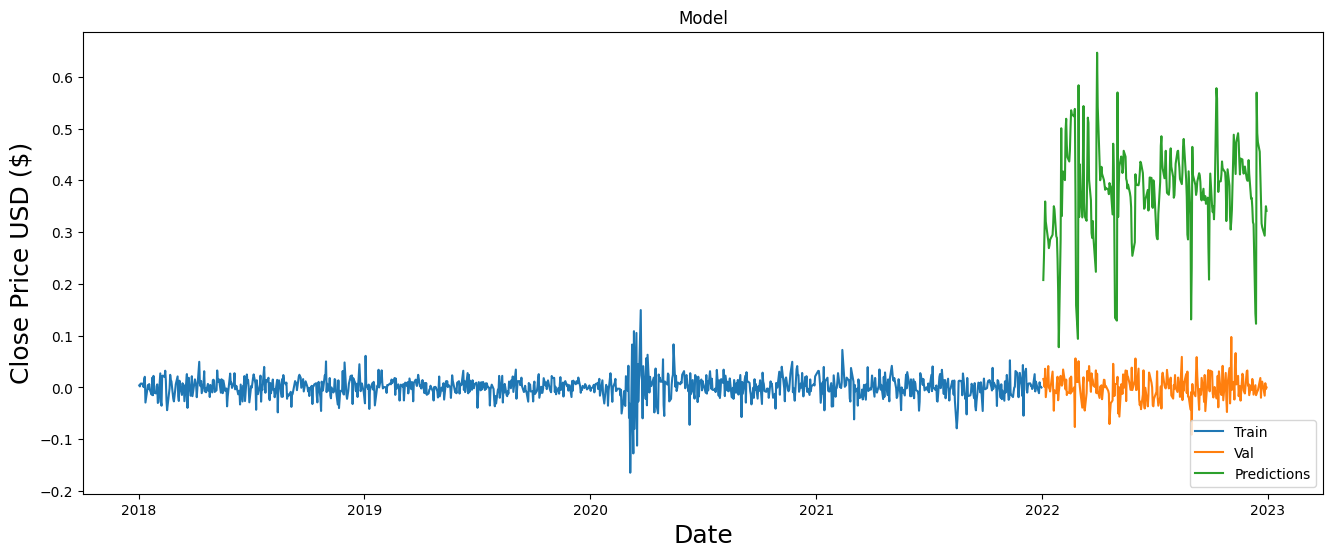

In [41]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['BHP_Return'])
plt.plot(valid[['BHP_Return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
model.save("BHP_LSTM.keras")